In [2]:
import sys
sys.path.append('/Users/gk/repos/pp2/Non-stationary-point-process')
from pointprocess.simulation.hawkes_exp import HawkesExp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Correct import - use the actual function that exists
from pointprocess.estimation.mle import fit_hawkes

In [4]:
df1 = pd.read_csv(
    "/Users/gk/Downloads/SG/SG_20170117.csv.gz",
    compression='gzip',
    parse_dates=["ets"],
    index_col=0,
    date_format='%Y%m%d:%H:%M:%S.%f',
    engine='pyarrow'
)

In [5]:
start_time = df1.ets.min()
event_times = (df1.ets - start_time).dt.total_seconds().values
T = event_times.max()

In [7]:
# Fit Hawkes Exponential Model
print("Fitting Hawkes Exponential Model...")
result_exp = fit_hawkes(event_times, T, H0="exp")

print(f"Optimization success: {result_exp.success}")
print(f"Log-likelihood: {-result_exp.fun:.2f}")
print("Parameters:")
for param, value in result_exp.params_dict.items():
    print(f"  {param}: {value:.6f}")

Fitting Hawkes Exponential Model...
Optimization success: True
Log-likelihood: 4511058.73
Parameters:
  mu: 6.730148
  alpha: 1970.143593
  beta: 2176.678707
Optimization success: True
Log-likelihood: 4511058.73
Parameters:
  mu: 6.730148
  alpha: 1970.143593
  beta: 2176.678707


In [ ]:
# Fit Hawkes Power Law Model
print("\nFitting Hawkes Power Law Model...")
result_pl = fit_hawkes(event_times, T, H0="pl")

print(f"Optimization success: {result_pl.success}")
print(f"Log-likelihood: {-result_pl.fun:.2f}")
print("Parameters:")
for param, value in result_pl.params_dict.items():
    print(f"  {param}: {value:.6f}")


Fitting Hawkes Power Law Model...


In [ ]:
# Fit Hawkes Multi-Exponential Model
print("\nFitting Hawkes Multi-Exponential Model...")
result_multiexp = fit_hawkes(event_times, T, H0="multiexp")

print(f"Optimization success: {result_multiexp.success}")
print(f"Log-likelihood: {-result_multiexp.fun:.2f}")
print("Parameters:")
for param, value in result_multiexp.params_dict.items():
    if isinstance(value, np.ndarray):
        print(f"  {param}: {value}")
    else:
        print(f"  {param}: {value:.6f}")



Fitting Hawkes Multi-Exponential Model...
Optimization success: True
Log-likelihood: 4552890.74
Parameters:
  mu: 6.883115
  alphas: [  34.0443296    84.82353242 1695.38479769]
  betas: [1053.88953809  795.8781629  2439.60036634]
  J: 3.000000
Optimization success: True
Log-likelihood: 4552890.74
Parameters:
  mu: 6.883115
  alphas: [  34.0443296    84.82353242 1695.38479769]
  betas: [1053.88953809  795.8781629  2439.60036634]
  J: 3.000000


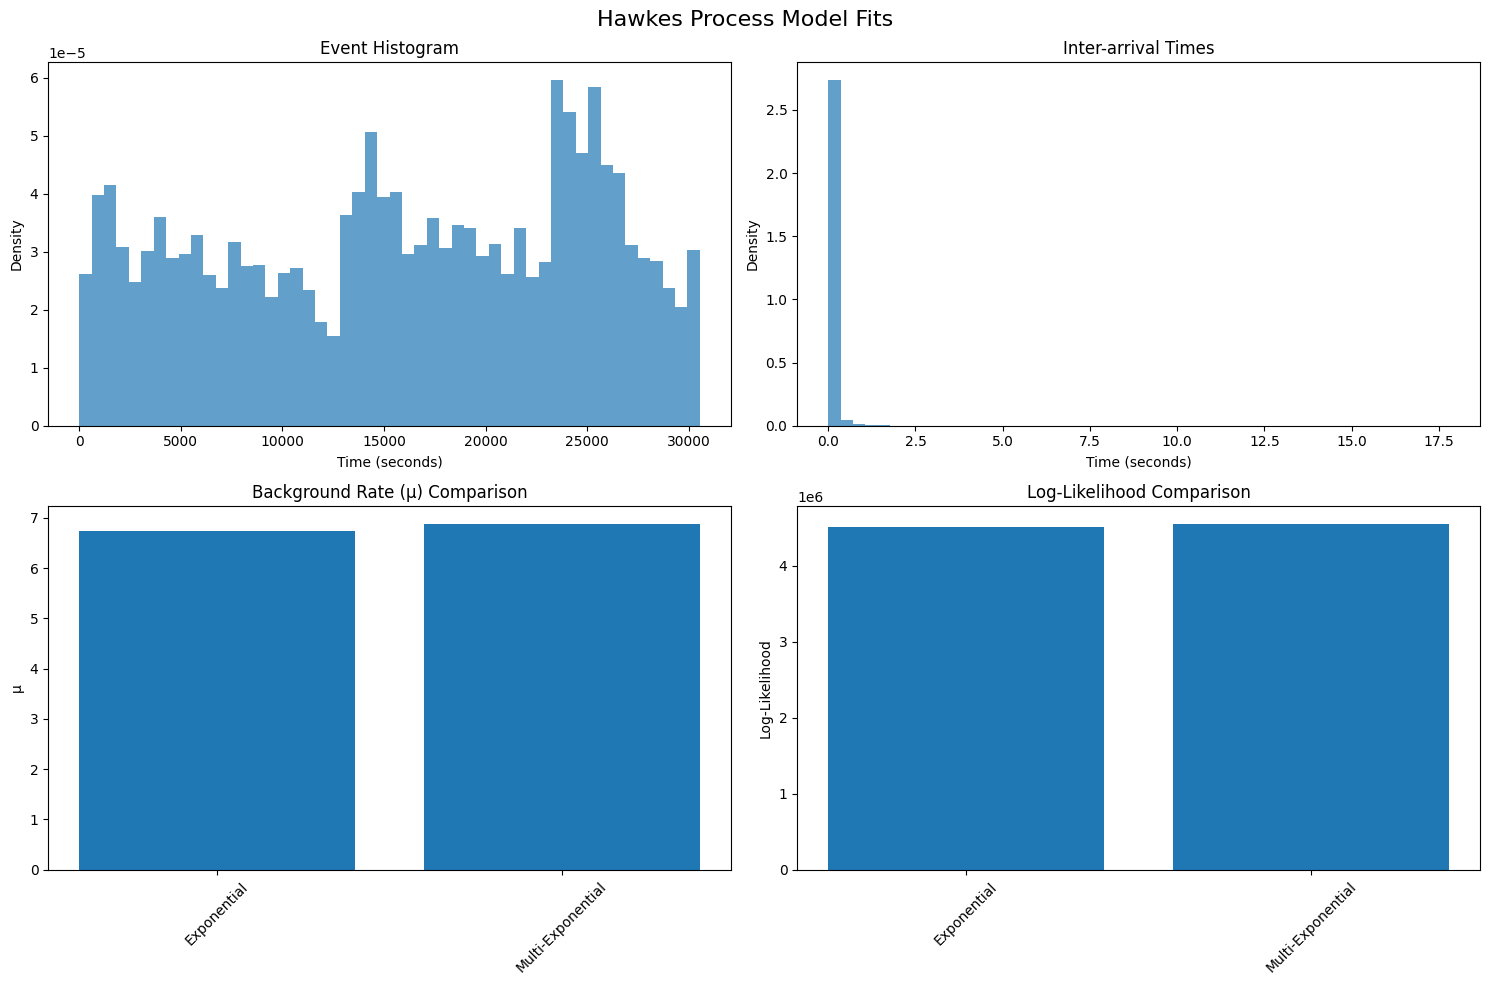

In [12]:
# Visualize the fitted intensities (optional)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Hawkes Process Model Fits', fontsize=16)

# Plot event times
axes[0, 0].hist(event_times, bins=50, alpha=0.7, density=True)
axes[0, 0].set_title('Event Histogram')
axes[0, 0].set_xlabel('Time (seconds)')
axes[0, 0].set_ylabel('Density')

# Plot inter-arrival times
if len(event_times) > 1:
    inter_arrivals = np.diff(event_times)
    axes[0, 1].hist(inter_arrivals, bins=50, alpha=0.7, density=True)
    axes[0, 1].set_title('Inter-arrival Times')
    axes[0, 1].set_xlabel('Time (seconds)')
    axes[0, 1].set_ylabel('Density')

# Plot parameter comparison
models_for_plot = ['Exponential', 'Multi-Exponential']
mu_values = [result_exp.params_dict['mu'],  
             result_multiexp.params_dict['mu']]

axes[1, 0].bar(models_for_plot, mu_values)
axes[1, 0].set_title('Background Rate (μ) Comparison')
axes[1, 0].set_ylabel('μ')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot log-likelihood comparison
loglik_values = [-result_exp.fun, -result_multiexp.fun]
axes[1, 1].bar(models_for_plot, loglik_values)
axes[1, 1].set_title('Log-Likelihood Comparison')
axes[1, 1].set_ylabel('Log-Likelihood')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Simulating Exponential model...
  Simulation 1: 2174559 total events, 510083 in window
  Simulation 1: 2174559 total events, 510083 in window
  Simulation 2: 2161232 total events, 501796 in window
  Simulation 2: 2161232 total events, 501796 in window
  Simulation 3: 2150368 total events, 511065 in window
  Simulation 3: 2150368 total events, 511065 in window

Simulating Multi-Exponential model...

Simulating Multi-Exponential model...
  Simulation 1: 1262761 total events, 296078 in window
  Simulation 1: 1262761 total events, 296078 in window
  Simulation 2: 1259251 total events, 298925 in window
  Simulation 2: 1259251 total events, 298925 in window
  Simulation 3: 1271171 total events, 296758 in window
  Simulation 3: 1271171 total events, 296758 in window


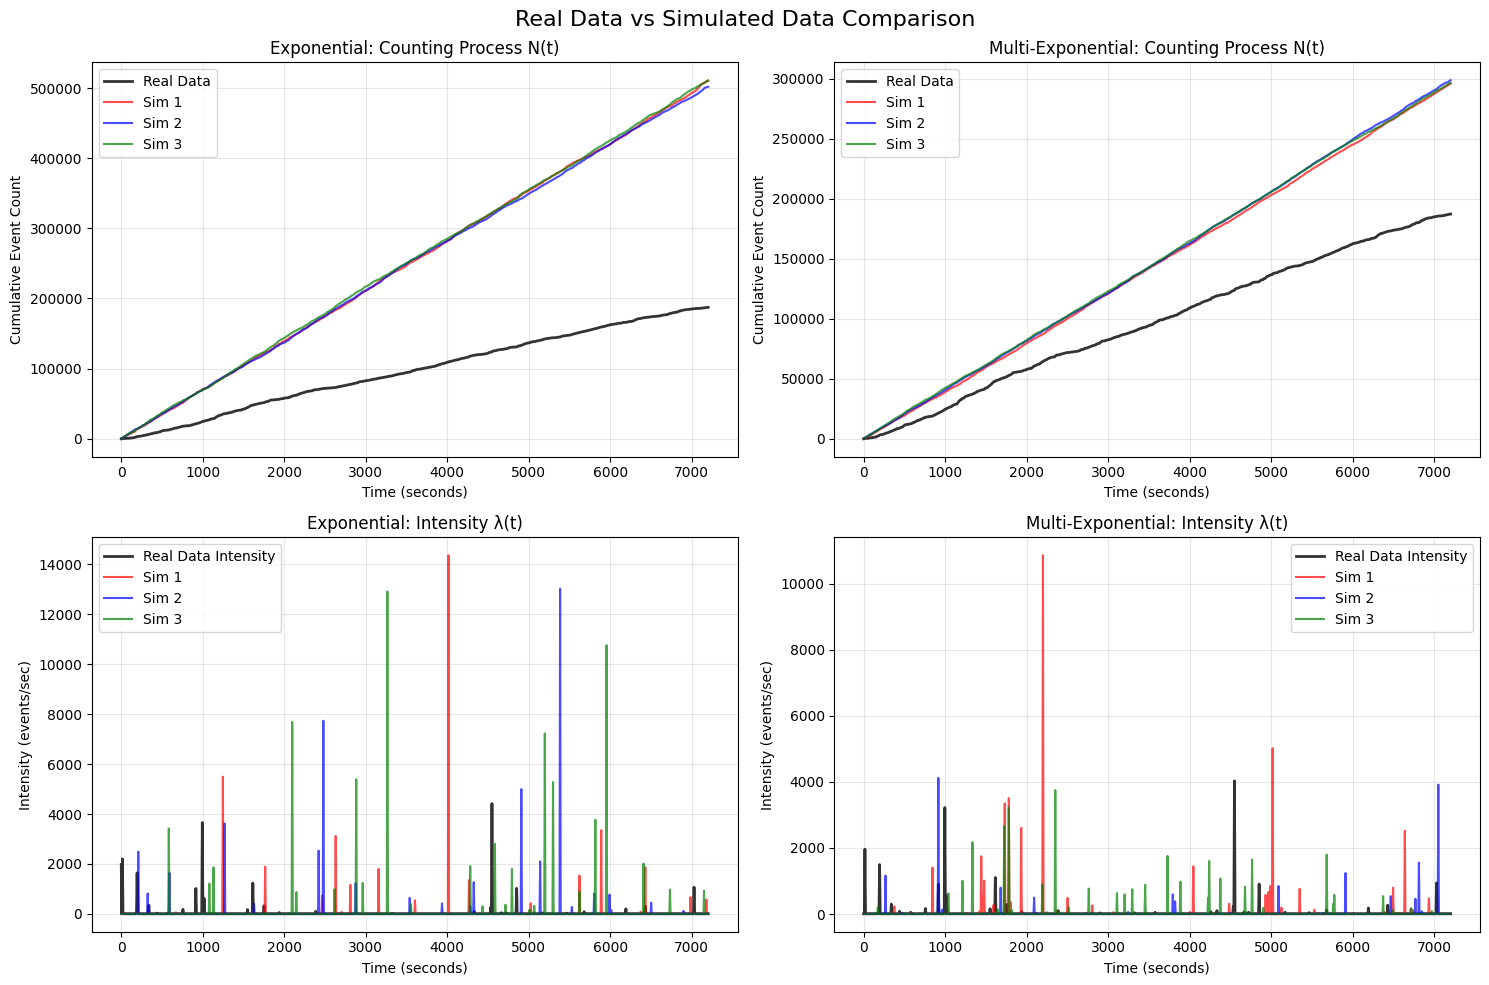


SUMMARY STATISTICS
Real Data:
  Total events: 841149
  Event rate: 27.542779 events/sec

Exponential Model:
  Parameters: μ=6.730148, α=1970.143593, β=2176.678707
  Log-likelihood: 4511058.73

Multi-Exponential Model:
  Parameters: μ=6.883115
  Alphas: [  34.0443296    84.82353242 1695.38479769]
  Betas: [1053.88953809  795.8781629  2439.60036634]
  Log-likelihood: 4552890.74


In [14]:
# Simplified simulation and comparison
from pointprocess.simulation.hawkes_exp import HawkesExp
from pointprocess.simulation.hawkes_multiexp import HawkesMultiExp
import matplotlib.pyplot as plt
import numpy as np

def simple_simulate_and_compare(real_events, T, fitted_results, n_simulations=3):
    """
    Simple comparison with N(t) and intensity plots
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Real Data vs Simulated Data Comparison', fontsize=16)
    
    models = {
        'Exponential': fitted_results['exp'],
        'Multi-Exponential': fitted_results['multiexp']
    }
    
    colors = ['red', 'blue', 'green']
    
    # Time grid for plotting (first 2 hours for better visibility)
    max_time = min(T, 7200)  # 2 hours
    time_grid = np.linspace(0, max_time, 1000)
    
    for col, (model_name, result) in enumerate(models.items()):
        print(f"\nSimulating {model_name} model...")
        
        # Extract parameters
        if model_name == 'Exponential':
            params = {
                "T": T,
                "mu": result.params_dict['mu'],
                "alpha": result.params_dict['alpha'],
                "beta": result.params_dict['beta']
            }
        else:  # Multi-Exponential
            params = {
                "T": T,
                "mu": result.params_dict['mu'],
                "alphas": result.params_dict['alphas'],
                "betas": result.params_dict['betas']
            }
        
        # Generate simulations
        simulated_events = []
        for i in range(n_simulations):
            if model_name == 'Exponential':
                hawkes = HawkesExp(params)
            else:
                hawkes = HawkesMultiExp(params)
            
            sim_events = np.array(hawkes.events)
            sim_events = sim_events[sim_events <= max_time]  # Keep only events in time window
            simulated_events.append(sim_events)
            print(f"  Simulation {i+1}: {len(hawkes.events)} total events, {len(sim_events)} in window")
        
        # Plot 1: N(t) - Cumulative count function
        ax1 = axes[0, col]
        
        # Real data N(t)
        real_subset = real_events[real_events <= max_time]
        real_N_t = np.searchsorted(real_subset, time_grid, side='right')
        ax1.plot(time_grid, real_N_t, 'k-', linewidth=2, label='Real Data', alpha=0.8)
        
        # Simulated N(t)
        for i, sim_events in enumerate(simulated_events):
            sim_N_t = np.searchsorted(sim_events, time_grid, side='right')
            ax1.plot(time_grid, sim_N_t, color=colors[i], alpha=0.7, 
                    linewidth=1.5, label=f'Sim {i+1}')
        
        ax1.set_title(f'{model_name}: Counting Process N(t)')
        ax1.set_xlabel('Time (seconds)')
        ax1.set_ylabel('Cumulative Event Count')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Intensity λ(t)
        ax2 = axes[1, col]
        
        # Real data intensity
        if model_name == 'Exponential':
            real_intensity = HawkesExp._intensity_on_grid(time_grid, params, real_subset)
        else:
            real_intensity = HawkesMultiExp._intensity_on_grid(time_grid, params, real_subset)
        
        ax2.plot(time_grid, real_intensity, 'k-', linewidth=2, 
                label='Real Data Intensity', alpha=0.8)
        
        # Simulated intensities
        for i, sim_events in enumerate(simulated_events):
            if model_name == 'Exponential':
                sim_intensity = HawkesExp._intensity_on_grid(time_grid, params, sim_events)
            else:
                sim_intensity = HawkesMultiExp._intensity_on_grid(time_grid, params, sim_events)
            
            ax2.plot(time_grid, sim_intensity, color=colors[i], alpha=0.7,
                    linewidth=1.5, label=f'Sim {i+1}')
        
        ax2.set_title(f'{model_name}: Intensity λ(t)')
        ax2.set_xlabel('Time (seconds)')
        ax2.set_ylabel('Intensity (events/sec)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*60)
    print("SUMMARY STATISTICS")
    print("="*60)
    
    real_count = len(real_events)
    real_rate = real_count / T
    
    print("Real Data:")
    print(f"  Total events: {real_count}")
    print(f"  Event rate: {real_rate:.6f} events/sec")
    
    for model_name, result in models.items():
        print(f"\n{model_name} Model:")
        if model_name == 'Exponential':
            params = result.params_dict
            print(f"  Parameters: μ={params['mu']:.6f}, α={params['alpha']:.6f}, β={params['beta']:.6f}")
        else:
            params = result.params_dict
            print(f"  Parameters: μ={params['mu']:.6f}")
            print(f"  Alphas: {params['alphas']}")
            print(f"  Betas: {params['betas']}")
        
        print(f"  Log-likelihood: {-result.fun:.2f}")
    
    return simulated_events

# Run the simplified comparison
fitted_results = {
    'exp': result_exp,
    'multiexp': result_multiexp
}

simulated_data = simple_simulate_and_compare(event_times, T, fitted_results, n_simulations=3)